# 基于baseline数据集的用户流失预测调研报告

## 1. 背景介绍
用户留存分析是客户关系管理(CRM)中最基本的组成部分，了解用户忠诚度也是游戏商业运营的一个重要工作。通过对于用户在下一时间段的流失的可能性估计，我们可以对用户进行提前干预，从而更好的挽留住用户，或者说最大限度的延长用户的产品使用时间，减少用户流失量，获得更大的收益。[调查研究](https://thekinigroup.com/customer-churn-rate/)表明，获得一个新用户的所花费的成本是保留一个现有用户所花成本的5-25倍，并且用户留存提高5%可以产生25-95%的收益增加。再由于互联网相关产品容易出现爆炸性用户增长，继而形成winner takes all的情景，很多互联网行业会投入大笔资金抢占市场和用户（比如Uber和滴滴）。因此，用户流失预测是任何手机游戏企业以及其他互联网相关产品企业都需要进行的重要调研。

用户流失预测可以指代两个概念：1.用机器学习方法去预测用户流失的可能性。2.用时间序列以及回归分析去估计未来一批用户的流失率。本篇报告是利用baseline数据集进行前者实验，也就是通过建模预测用户在未来一段时间内流失的可能性。

本篇报告会以该用户流失预测调研项目的详细过程和结果，分别从数据集，问题定义，特征抽取，模型建造对比，模型测评，今后研究工作，以及总结这几个方面进行介绍。

## 2. 数据集描述
本篇报告所用到的数据集是baseline项目所产生的2016年1-3月所产生的baseline(timeline)用户基本信息，用户消费信息，以及用户行为操作信息。改数据集的详细信息可见项目文档。

让我们先看一下所用数据集的数据样例：

In [3]:
from feature_extractor import *

In [4]:
%matplotlib inline

#### userbase 数据：

In [2]:
userbase = get_userbase('/data/yulun/timeline/')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (3,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
userbase.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,cc9e7e5a785249bf1c4851c8e99f3c12,505c4018294c097167f16fd97e5ec71c,222.66.154.211,NaN,None,None,102,0,1433,2016-01-04 16:56:25,[],gp3658880,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,c98cb261ca217c8742644de2e804da17,6835f917ada02b5305d9ccd2c9e9fe00,113.25.103.146,NaN,喜形于色的刀刀客,None,102,0,9831,2016-03-02 00:43:16,[],qcosfymofte,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,ff895ebb528ee0630634ecc4af5f94dc,cfcd208495d565ef66e7dff9f98764da,223.104.14.62,NaN,兔兔图陌陌,None,102,0,100,2016-03-02 00:43:14,[],None,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,df045daec3dd39fde07ca14f37fba87c,334ab2e1b49cc26f0fb28f4d10372716,59.35.79.40,NaN,喜形于色的担担面,None,101,0,1208,2016-03-02 00:43:12,[],ccyyxx7461,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,e4fd60bbc255cd12daeb5c4f308a2357,6c0fa3ac767d5e0de84ce1f0f1a33e76,59.35.79.40,NaN,喜形于色的担担手,None,101,0,1208,2016-03-02 00:43:12,[],ccyyxx7460,1.0,1.0,1.0,1.0,1.0,0.0,1.0


#### expenditure 数据：

In [8]:
expenditure = pd.read_csv('/data/yulun/timeline/expenditure_timeline.txt', sep='\t', header = None)

In [9]:
expenditure.head()

,0,1,2,3
0,cc9e7e5a785249bf1c4851c8e99f3c12,"[梦幻西游-2,101794,1433,2016-01-04 16:56:25,180132...","[0,0,0,0,0,0,0]","[0,0,0,0,0,0]"
1,c98cb261ca217c8742644de2e804da17,"[cos大乱斗,101203,9831,2016-03-02 00:43:16,I6FNA3...","[0,0,0,0,0,0,0]","[0,0,0,0,0,0]"
2,ff895ebb528ee0630634ecc4af5f94dc,"[0,0,0,0,0,0]","[0,0,0,0,0,0,0]","[0,0,0,0,0,0]"
3,df045daec3dd39fde07ca14f37fba87c,"[全民奇迹,101421,1208,2016-03-02 00:43:12,61H6YOK2...","[0,0,0,0,0,0,0]","[0,0,0,0,0,0]"
4,e4fd60bbc255cd12daeb5c4f308a2357,"[全民奇迹,101421,1208,2016-03-02 00:43:12,61F7KKQ6...","[0,0,0,0,0,0,0]","[0,0,0,0,0,0]"


#### event 数据（Note: 在此我们暂时用的是gpapp的event数据）：

In [12]:
event = pd.read_csv('/data/yulun/timeline/timeline_event_gpapp.txt', sep='\t', header = None)

In [13]:
event.head()

,0,1,2
0,3cda6297f411446046cc5af3959a84be,1000,1442991632
1,3cda6297f411446046cc5af3959a84be,1004,1442991661
2,3cda6297f411446046cc5af3959a84be,1000,1442991632
3,3cda6297f411446046cc5af3959a84be,1004,1442991661
4,3cda6297f411446046cc5af3959a84be,1000,1442991632


#### 其中，对于event数据我们可以观察一下event时间戳的histogram：

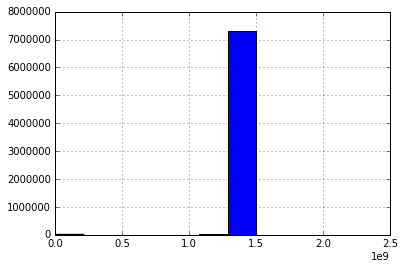

In [17]:
event[2].hist()

显然，数据集中有脏数据，让我们把调研时间外的event排除掉：

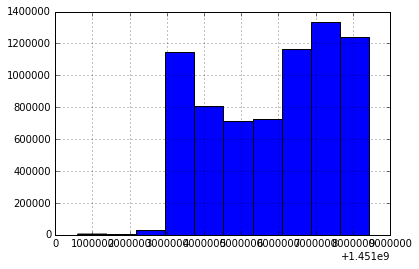

In [18]:
event = event[event[2] >= time_start]
event = event[event[2] <= time_end]
event[2].hist()

Better, 大致能看出二月三月的用户活动量比一月大很多，再让我们再看看每个用户（基于uuid）的留存/活跃时间状况：

In [19]:
duration = {}
g = event.groupby([0])
for each in g.groups:
    idx = g.groups[each]
    duration[each] = max(event.loc[idx][2]) - min(event.loc[idx][2])
dur = pd.DataFrame(duration.values())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b47a3d90>]], dtype=object)

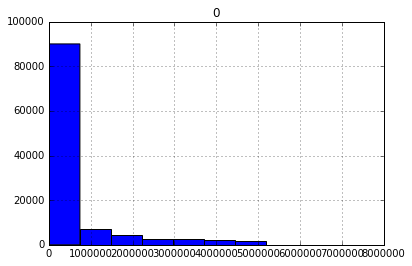

In [20]:
dur.hist()

可以看出绝大部分用户的活跃时间都很短，让我们缩进看一下活跃时间小于等于一月，一周, 一天的用户分布：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b31c9e10>]], dtype=object)

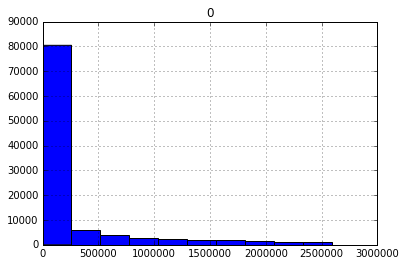

In [22]:
dur_month = pd.DataFrame(filter(lambda x: x <= 2592000,duration.values()))
dur_month.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b322bcd0>]], dtype=object)

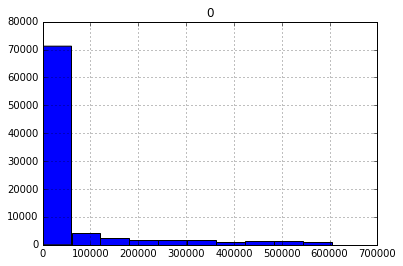

In [23]:
dur_week = pd.DataFrame(filter(lambda x: x <= 604800,duration.values()))
dur_week.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b2fd8050>]], dtype=object)

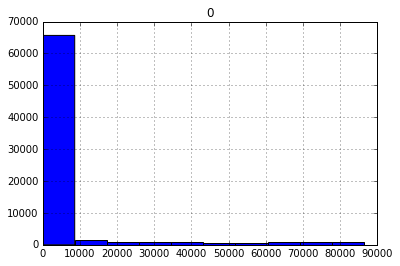

In [24]:
dur_day = pd.DataFrame(filter(lambda x: x <= 86400,duration.values()))
dur_day.hist()

##### 可以发现绝大部分(大约60%)的用户活跃时间小于一天！
那我们看看活跃时间大于一周，一天的用户个数分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b2c4e510>]], dtype=object)

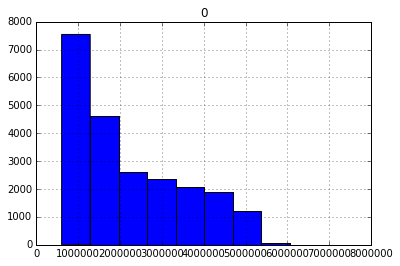

In [26]:
dur_week = pd.DataFrame(filter(lambda x: x >= 604800,duration.values()))
dur_week.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b2f25650>]], dtype=object)

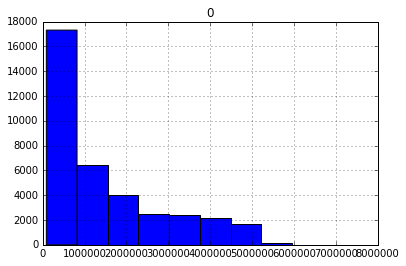

In [29]:
dur_day = pd.DataFrame(filter(lambda x: x >= 86400,duration.values()))
dur_day.hist()

可以发现大于一周的留存用户个数分布曲线更趋于平缓，因此，**决定将提取特征的window设为七天**。

## 3. 问题定义
因为uid与uuid相互关联对应逻辑只能将50%的uid对应上uuid（详见公司uid与uuid对应逻辑文档），而event数据只记录uuid的行为，若将uuid对应成uid，将有很多event数据的uuid无法对应上uid而变为废数据，因此我们所定义用户是基于uuid而不是uid。

同样的，userbase的用户画像数据和expenditure的用户消费数据只能当做辅助信息，只能给部分uuid提供特征。

**定义用户流失： 只要用户在大于一个时间段内（我们规定是7天）没有event记录，则视为该用户流失。**

**定义预测问题：给定一个用户uuid，和一个时间界限，我们想通过timeline的用户历史数据得到的特征去预测时间界限之后七天内该用户是否流失（有没有event行为记录）。**

下图可以表示我们的流失定义以及问题定义：
<img src="p1.png" style="width: 600px;"/>

因此，基于baseline数据的用户流失预测基本可以分为以下几个步骤：
* 将baseline的数据groupby到每个用户
* 选择不同的时间界限，并在界限之后的7天时间段去观察该用户是否流失
* 用上一步时间界限之前的时间段内的数据提取特征
* 训练模型，cross-validate, evaluate, etc.

本篇报告后半部分均基于这几个步骤给实验结果和分析。

## 4. 特征抽取

#### 4.1 Group by User
baseline的数据groupby到每个用户十分简单，需注意的是expenditure消费数据需先找到uid到uuid的对应，再与event中的uuid进行匹配。

#### 4.2 Time Boundary
选择时间界限则更加tricky。若我们只选择一个时间界限，则每个用户只能作为一个数据点；但如果我们选择多个时间界限，部分用户可以产生更多的留存数据点供于模型训练；示例如图：

<img src="p2.png" style="width: 600px;"/>

在该示例图中我们可得出，User 1, User 2, User 4 是boundary 1的留存用户，给予标签0；User 1, User 3是boundary 2的留存用户，给予标签0，User 4是boundary 2的流失用户，给予标签1.

需要注意的是，在最后一个time boundary之后的数据点应排除于训练和测试集，因为我们无法知道这些数据点的标签。（无法知道boundary之后改用户是否有event产生）

#### 4.3 Feature Extraction
以七天作为我们的特征提取时间段，通过userbase、expenditure、以及event数据，我们可以抽取485个特征，以下是特征的介绍：

**4.3.1 Event Feature:**

| Column Index  | Feature Description  |
| ------------- | -------------------- |
| 1 - 199       | Number of event log based on different event ID   |
| 200 - 205     | Time statistics: max, min, range, mean, median, standard deviation             |
| 206 - 209     | Time difference statistics: max, min, mean, percentage             |
| 210 - 229     | Time statistics of event time - userbase register time (5 * 4)          |
| 230 - 249     | Time statistics of event time - time statistics of expenditure registeration time (5 * 4)    |
| 250 - 269     | Time statistics of event time - time statistics of expenditure recharge time (5 * 4)           |
| 270 - 289     | Time statistics of event time - time statistics of expenditure payment time (5 * 4)          |
| 290           | Number of event log based on different time windows: 7 days          |
| 291 - 292     | Number of event log based on different time windows: 3.5 * 2 days           |
| 293 - 296     | Number of event log based on different time windows: 1.75 * 4 days           |
| 297 - 303     | Number of event log based on different time windows: 1 * 7 days           |

**4.3.3 Userbase Feature:**

| Column Index  | Feature Description  |
| ------------- | -------------------- |
| 304           | number of uids       |
| 305           | number of reg_ips       |
| 306           | dummy: has signature or not       |
| 307           | dummy: has nickname or not       |
| 308           | sex majority       |
| 309           | sex unique count       |
| 310           | platform majority       |
| 311           | platform unique count       |
| 312           | ucid majority       |
| 313           | ucid unique count       |
| 314 - 319     | register time statistics: max, min, range, mean, median, standard deviation         |
| 320           | number of groups       |
| 321           | dummy: has group or not       |
| 322           | dummy: has name or not       |
| 323           | dummy: has realname or not       |
| 324           | dummy: has address or not       |
| 325           | dummy: has qq or not       |
| 326           | dummy: has email or not       |
| 327           | dummy: has contact or not       |
| 328           | dummy: has idn or not       |
| 329           | dummy: has pic_path or not       |
| 330 - 448     | dummy: has some particular group or not based on different groups       |


**4.3.2 Expenditure Feature:**

| Column Index  | Feature Description  |
| ------------- | -------------------- |
| 449           | number of uid (register)       |
| 450           | number of games (register)       |
| 451           | number of unique games (register)       |
| 452           | number of unique cids (register)       |
| 453           | number of unique game_uids (register)       |
| 454           | number of unique ucids (register)       |
| 455 - 460     | register time statistics: max, min, range, mean, median, standard deviation         |
| 461           | number of recharges (recharge)       |
| 462           | number of unique games (recharge)        |
| 463           | number of unique types (recharge)       |
| 464           | number of unique cids (recharge)       |
| 465           | number of unique items (recharge)       |
| 466           | number of unique appids (recharge)       |
| 467           | number of unique pay_froms (recharge)       |
| 468 - 473     | recharge time statistics: max, min, range, mean, median, standard deviation         |
| 474           | number of payments (payments)       |
| 475           | number of unique games (payments)        |
| 476           | number of unique cids (payments)       |
| 477           | number of unique appids (payments)       |
| 478           | number of unique items (payments)       |
| 479           | number of unique porders (payments)      |
| 480 - 485     | payment time statistics: max, min, range, mean, median, standard deviation         |


提取出的特征如下：

In [5]:
final = load_obj('final_augment')

In [6]:
final[308] = final[308].map(lambda x: ['None', '0', '1', '2'].index(x) if x in ['None', '0', '1', '2'] else 0)
final[310] = final[310].map(lambda x: [ '0', '102', '101'].index(x) if x in [ '0', '102', '101'] else 1)

In [7]:
indices = range(1, final.shape[1])

data = final[indices]
target = final[0]

In [9]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,476,477,478,479,480,481,482,483,484,485
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


可以看出的是，后面一部分特征存在的NaN值比较多，原因如上文所介绍的一样，uid与uuid对应匹配是不完全的。event uuids只能对应一部分userbase uuids和一小部分expenditure uids。在此展示一下匹配数据点的占比：

In [15]:
sum(data[448].notnull())/float(data.shape[0])

0.43706540677141376

In [16]:
sum(data[479].notnull())/float(data.shape[0])

0.14469698158815866

可见只有43.7%的数据点能匹配得到userbase特征，14.5%的数据点能匹配到expenditure特征。缺少匹配的数据点比较多这让特征工程和建模十分困难。

初步猜测有可能gpapp数据与userbase和expenditure匹配不太好，尝试了gpsdk数据的匹配。结果是userbase也只能匹配60%不到。因为gpsdk event的数据量太大，因此还是以gpapp在做后续试验。

再而猜测因为设置多个界限导致有可能放大了部分匹配不到userbase和expenditure的数据点。重新剔除重复数据后匹配数据占比仍然很低。

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
